# Question A

1. The minimum detectable flux is inversely proportional to the detector area. Increasing the area of the detector increases the sensitivity (smaller minimum detectable flux), while by decreasing the area, the sensitivity decreases as well. Fainter sources are detected when the sensitivity is increased (larger detector area): a larger detector area allows the telescope to collect more photons, increasing the signal-to-noise ratio and enhancing the ability to detect fainter sources of continuous radiation.

2. Observing time is also inversely proportional to the minimum detectable flux. Increasing observing time increases sensitivity. Decreasing the observing time decreases sensitivity. Fainter sources are detected with longer exposure time. 
  

3. The detector efficiency and background noise cause the sensitivity to vary with energy. A better sensitivity corresponds to higher detector efficiency and lower background flux at the specific energy of interest. The background count rate is lower at higher energies, and lower background noise increases the sensitivity. 

4. Increasing the thickness of the shielding reduces the background noise in the detector system and increases the efficiency, which decreases $F_{min}$. This means that the sensitivity is increased.

5. Expanding the field-of-view of a detector for a fixed shielding increases the likelihood of detecting additional sources but also raises the potential for capturing more background noise. Consequently, there is a risk of diminishing the detector's sensitivity.

6. The main difference between the continuum and line sensitivity calculation is the factor that multiplies the statistical significance of the measurement $\sigma$. In the continuum sensitivity calculation, $\sigma$ is multiplied by a factor of 1, while in the line sensitivity calculation, $\sigma$ is multiplied by a factor of 1.3.

7. High Purity Germanium (HPGe) detectors are the optimum choice for the best line sensitivity. They provide high efficiency and high-energy resolution for gamma-ray detection and spectroscopy. CdTe is excellent for applications requiring high detection efficiency at energies up to 100 keV, making it a suitable material for achieving strong instrument line sensitivity. The line spectrum sensitivity formula clearly indicates that higher efficiency corresponds to heightened detector sensitivity, a desirable attribute.

# Question B

In [47]:
FILENAME = 'apjs522922t2_mrt.txt'
from astropy.io import ascii

table = ascii.read(FILENAME, format='cds')



#Filtering the Data by Source Type

def filter_by(table, condition):
    _idcs = condition(table)
    return table[_idcs]

def splitstrip(s, sep=None):
    return tuple(v.strip() for v in s.split(sep=sep))

source_types = [splitstrip(s, ',') for s in table['Type']]

from collections import Counter

def flatten(it):
    """Flatten an iterable of iterables into a single iterable."""
    return (i for l in it for i in l)

counts = Counter(flatten(source_types))

# print the ten most 
counts.most_common()[:10]

def is_type(t):
    def _test(table):
        return [t in splitstrip(row['Type'], ',') for row in table]
    return _test

_keys = ('AGN', 'LMXB', 'HMXB')
tables = {key : filter_by(table, is_type(key)) for key in _keys}




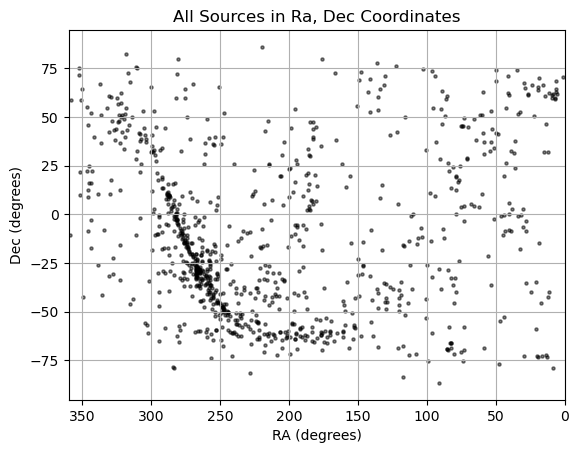

In [48]:
#Equatorial Coordinates
import matplotlib.pyplot as plt

ra, dec = table['RAdeg'], table['DEdeg']

fig, ax = plt.subplots()
#figsize=(10, 6)
scatter = ax.scatter(ra, dec, s=5, c='black', alpha=0.5)

ax.set_title('All Sources in Ra, Dec Coordinates')
ax.set_xlabel('RA (degrees)')
ax.set_ylabel('Dec (degrees)')
ax.grid(True)
ax.set_xlim(360, 0)

plt.show()

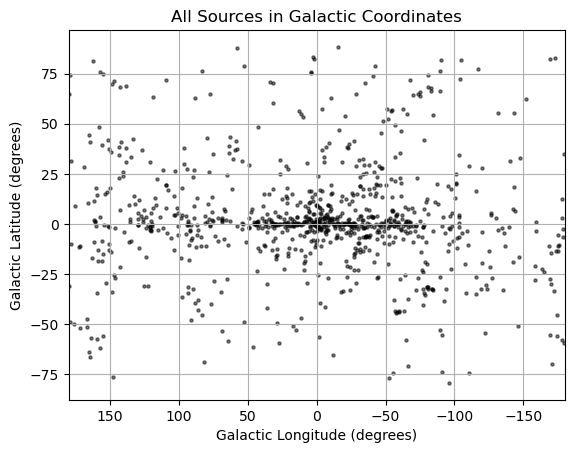

In [49]:
#Galactic Coordinates
from astropy.coordinates import SkyCoord 

def to_galactic_coords(ra, dec):
    """Convert equatorial coordinates to galactic coordinates.
    
    All coordinates are given in degrees. The Galactic latitude is
    mapped to the interval (-180, 180]. 
    
    """
    coord = SkyCoord(ra, dec, unit='deg')
    l, b = coord.galactic.l, coord.galactic.b
    l = l.wrap_at('180d')
    return l.degree, b.degree

l, b = to_galactic_coords(ra, dec)

fig, ax = plt.subplots()
scatter = ax.scatter(l, b, s=5, c='black', alpha=0.5)

ax.set_title('All Sources in Galactic Coordinates')
ax.set_xlabel('Galactic Longitude (degrees)')
ax.set_ylabel('Galactic Latitude (degrees)')
ax.set_xlim(180,-180)
ax.grid(True)


plt.show()

2. Change the colour of the sources and comment on location relative to the galactic plane of LMXB, HMXB, and AGN.

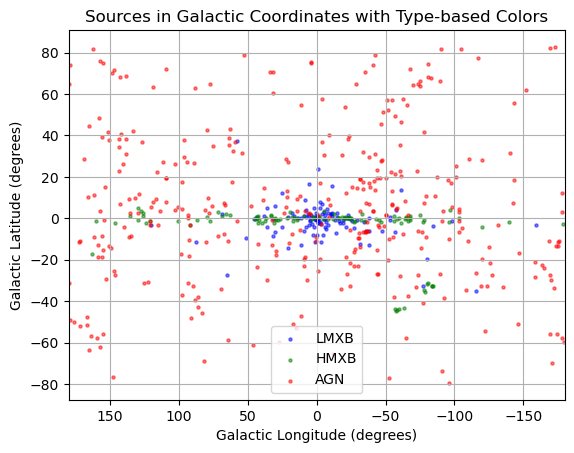

In [50]:
fig, ax = plt.subplots()

color_map = {
    'LMXB': 'blue',
    'HMXB': 'green',
    'AGN': 'red',
}

for key, color in color_map.items():
    source_type = key
    

    table1 = tables[source_type]
    
    ra, dec =  table1['RAdeg'], table1['DEdeg']
    
    l, b = to_galactic_coords(ra, dec)
    
    ax.scatter(l, b, s=5, c=color, alpha=0.5, label=source_type)

ax.set_title('Sources in Galactic Coordinates with Type-based Colors')
ax.set_xlabel('Galactic Longitude (degrees)')
ax.set_ylabel('Galactic Latitude (degrees)')
ax.set_xlim(180,-180)
ax.legend()
ax.grid(True)

plt.show()

3. How many sources in the catalog are LMXB, HMXB, AGN?


In [51]:
for key, tab in tables.items():
    print(f"{key} : {len(tab)}")

AGN : 358
LMXB : 120
HMXB : 108


4. The catalog makes use of recently acquired datasets, uncovering a significant portion (23%) of sources that remain unidentified, demanding further investigation. A follow-up strategy is essential, particularly for sources with weaker persistence. Handling transient detections presents a greater challenge due to their unexpected discovery. A detailed analysis of transients, taking into account factors like outburst duration, timing, spectral properties, and quiescent emission, is crucial for better understanding their nature.

5. What is the flux of the brightest/weakest AGN detected in the 20-40 keV band?

In [52]:
table_AGN = tables['AGN']
flux=table_AGN["F20-40"]
def flux_min_and_max(flux):
    smallest_flux = float('inf')  
    largest_flux = float('-inf')  
    
    for value in flux:
        smallest_flux = min(smallest_flux, value)
        largest_flux = max(largest_flux, value)
    return smallest_flux, largest_flux

min_flux, max_flux = flux_min_and_max(flux)

print(f"The flux of the weakest AGN detected in the 20-40 keV band is: {min_flux}")
print(f"The flux of the brightest AGN detected in the 20-40 keV band is: {max_flux}")

The flux of the weakest AGN detected in the 20-40 keV band is: 0.2
The flux of the brightest AGN detected in the 20-40 keV band is: 44.3


6. If the sensitivity changed to 1mCrab, how many AGN would remain in the sample?

In [53]:
def flux_greater_than_1mCrab(table_AGN):
    return table_AGN['F20-40'] > 1
new_table = filter_by(table_AGN, flux_greater_than_1mCrab)

print(f"If the sensitivity changed to 1mCrab, the remaining AGN in the sample would be: {len(new_table)}")

If the sensitivity changed to 1mCrab, the remaining AGN in the sample would be: 184


7. If the sensitivity changed to 2mCrab, how many AGN would remain in the sample?

In [54]:
def flux_greater_than_2mCrab(table_AGN):
    return table_AGN['F20-40'] > 2
new_table = filter_by(table_AGN, flux_greater_than_2mCrab)

print(f"If the sensitivity changed to 2mCrab, the remaining AGN in the sample would be: {len(new_table)}")

table_HMXB = tables['HMXB']
flux_HMXB=table_HMXB["F20-40"]

If the sensitivity changed to 2mCrab, the remaining AGN in the sample would be: 80


# Question C

Describe and discuss the distribution of different types of sources (AGN, LMXB, and HMXB) as
a function of flux (brightness). Comment quantitatively on the effect of improving the detector
sensitivity on the number of sources detected.

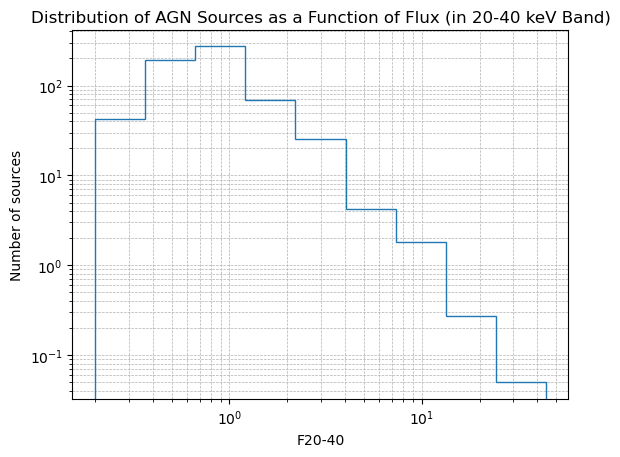

In [96]:
import numpy as np
import matplotlib.pyplot as plt

table_AGN = tables['AGN']
flux_AGN = table_AGN["F20-40"]
x = flux_AGN

def histogram(ax, x, bins=10, range=None, density=False, normed=True, histtype='step', **kwargs):
    # Compute the histogram
    _counts, _bin_edges = np.histogram(x, bins, range)
    
    # Apply normalizations
    if density:
        _widths = _bin_edges[1:] - _bin_edges[:-1]
        _counts = _counts / (_widths * x.size)
    elif normed:
        _widths = _bin_edges[1:] - _bin_edges[:-1]
        _counts = _counts / _widths
    
    # Plot the histogram
    return ax.hist(_bin_edges[:-1], _bin_edges, weights=_counts, 
                   histtype=histtype, **kwargs)

log_bins = np.geomspace(x.min(), x.max(), 10)

fig, ax = plt.subplots(1)
histogram(ax, x=flux_AGN, bins=log_bins, histtype="step")

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('F20-40')
ax.set_ylabel('Number of sources')
ax.set_title('Distribution of AGN Sources as a Function of Flux (in 20-40 keV Band)')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.minorticks_on()
plt.show()


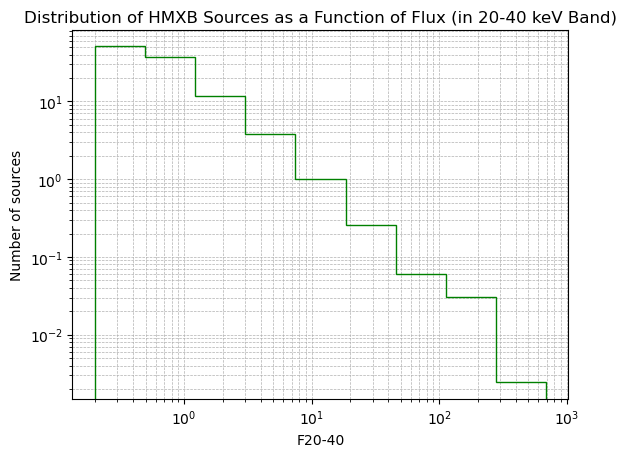

In [99]:
table_HMXB = tables['HMXB']
flux_HMXB=table_HMXB["F20-40"]
x=flux_HMXB

def histogram(ax, x, bins=10, range=None, density=False, normed=True, histtype='step', **kwargs):
    # Compute the histogram
    _counts, _bin_edges = np.histogram(x, bins, range)
    
    # Apply normalizations
    if density:
        _widths = _bin_edges[1:] - _bin_edges[:-1]
        _counts = _counts / (_widths * x.size)
    elif normed:
        _widths = _bin_edges[1:] - _bin_edges[:-1]
        _counts = _counts / _widths
    
    # Plot the histogram
    return ax.hist(_bin_edges[:-1], _bin_edges, weights=_counts, 
                   histtype=histtype, **kwargs)

log_bins = np.geomspace(x.min(), x.max(), 10)

fig, ax = plt.subplots(1)
histogram(ax, x=flux_HMXB, bins=log_bins, histtype="step", color='green')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('F20-40')
ax.set_ylabel('Number of sources')
ax.set_title('Distribution of HMXB Sources as a Function of Flux (in 20-40 keV Band)')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.minorticks_on()
plt.show()

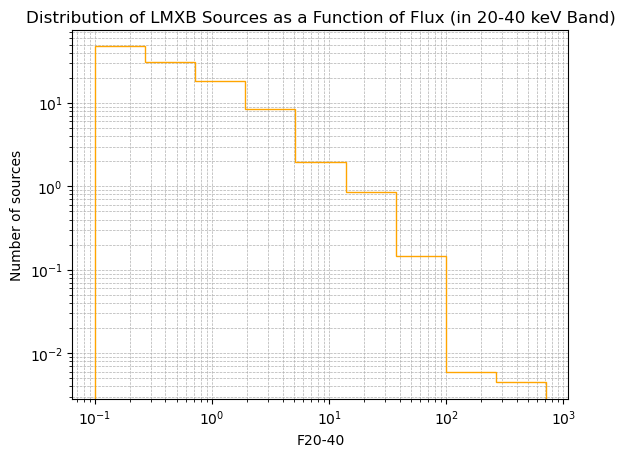

In [100]:
table_LMXB = tables['LMXB']
flux_LMXB=table_LMXB["F20-40"]
x=flux_LMXB

def histogram(ax, x, bins=10, range=None, density=False, normed=True, histtype='step', **kwargs):
    # Compute the histogram
    _counts, _bin_edges = np.histogram(x, bins, range)
    
    # Apply normalizations
    if density:
        _widths = _bin_edges[1:] - _bin_edges[:-1]
        _counts = _counts / (_widths * x.size)
    elif normed:
        _widths = _bin_edges[1:] - _bin_edges[:-1]
        _counts = _counts / _widths
    
    # Plot the histogram
    return ax.hist(_bin_edges[:-1], _bin_edges, weights=_counts, 
                   histtype=histtype, **kwargs)


log_bins = np.geomspace(x.min(), x.max(), 10)

fig, ax = plt.subplots(1)
histogram(ax, x=flux_LMXB, bins=log_bins, histtype="step", color='orange')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('F20-40')
ax.set_ylabel('Number of sources')
ax.set_title('Distribution of LMXB Sources as a Function of Flux (in 20-40 keV Band)')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.minorticks_on()
plt.show()

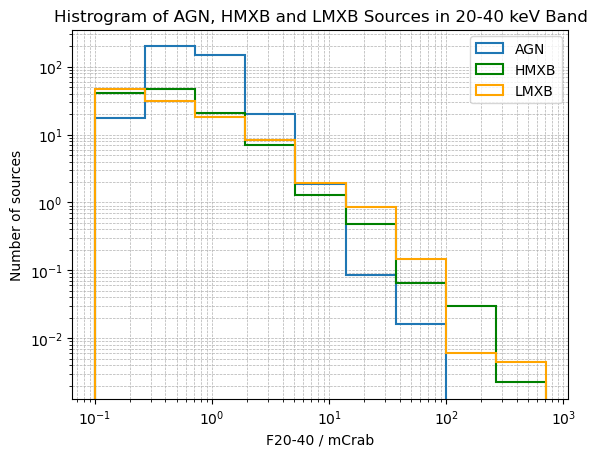

In [103]:
fig, ax = plt.subplots(1)
histogram(ax, x=flux_AGN, histtype= "step", bins = log_bins, linewidth=1.5, label='AGN')
histogram(ax, x=flux_HMXB, histtype= "step", bins = log_bins, linewidth=1.5, color='green',  label='HMXB')
histogram(ax, x=flux_LMXB, histtype="step", bins=log_bins, linewidth=1.5, color='orange', label='LMXB')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('F20-40 / mCrab')
ax.set_ylabel('Number of sources')
ax.set_title('Histrogram of AGN, HMXB and LMXB Sources in 20-40 keV Band')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.minorticks_on()
ax.legend()
plt.show()

The histogram of the sources clearly shows that with improved sensitivity (at lower fluxes), the number of detected sources is much higher compared to when sensitivity is reduced (at higher fluxes). At flux $10^{-1}$ mCrab the number of sources detected is between 10 and $10^2$ mCrab for AGN, HMXB and LMXB. The detection rate of sources decreases more rapidly at higher flux levels. AGN sources have a maximum detection density between $10^{-1}$ mCrab and $10^{0}$ mCrab. 

Now we plot the number of sources that are brighter than flux F as a function of flux F (the complementary cumulative distribution function, sometimes referred to in astronomy as a log N–log S plot).

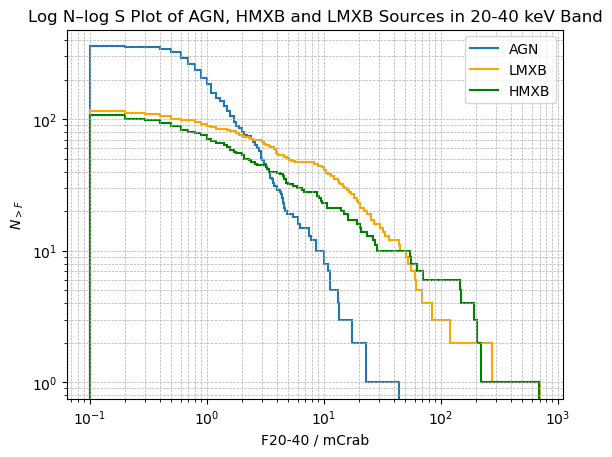

In [60]:
def cumulative_histogram(ax, x, xrange=None, reverse=False, **kwargs):
    # use the data as the bin edges  
    _edges = np.sort(x)

    # optionally restrict (or extend) the range
    if xrange is not None:
        _xmin, _xmax = xrange
        _start = np.searchsorted(_edges, _xmin)
        _stop = np.searchsorted(_edges, _xmax)
        _edges = np.array([_xmin, *_edges[_start:_stop], _xmax])
    else:
        _start, _stop = 1, x.size-1
        
    # count the number of x below using index
    _count = np.arange(_start, _stop+1)
    
    # calculate complementary cumulative distribution
    if reverse:
        _count = x.size - _count

    # plot using Axes.stairs
    return ax.stairs(_count, _edges, **kwargs)


fig, ax = plt.subplots(1)

cumulative_histogram(ax, x=flux_AGN, xrange=(x.min(), x.max()), reverse=True, linestyle='-', linewidth=1.5, label='AGN')
cumulative_histogram(ax, x=flux_LMXB, xrange=(x.min(), x.max()), reverse=True, color='orange', linestyle='-', linewidth=1.5, label='LMXB')
cumulative_histogram(ax, x=flux_HMXB, xrange=(x.min(), x.max()), reverse=True, color='green', linestyle='-', linewidth=1.5, label='HMXB')



ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('F20-40 / mCrab')
ax.set_ylabel(r'$N_{> F}$')
ax.set_title('Log N–log S Plot of AGN, HMXB and LMXB Sources in 20-40 keV Band')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.minorticks_on()
ax.legend()
plt.show()


The plots show the number of sources that are brighter than flux F as a function of flux (complementary cumulative distribution function). AGN sources are more frequently detected at lower fluxes compared to LMXB and HMXB sources. This aligns with the findings of the plot depicting sources in galactic coordinates, where the highest number of detected sources corresponds to AGN (as also presented in question B, part 3). At higher fluxes, corresponding to decreased instrument sensitivity, few AGN sources are detected, reaching zero around a flux of 45 mCrab. This is attributed to the dispersed distribution of AGN sources throughout the galaxy. In contrast, LMXB and HMXB sources exhibit a decline in detection at higher fluxes compared to AGN sources, both reaching zero detected sources around a flux of 680 mCrab. LMXB and HMXB sources, being more concentrated near the center of the galaxy, exhibit higher detectability at lower instrument sensitivity compared to AGN sources, which are dispersed throughout the galaxy.

# Question D

1. Use the photon fluxes from the table to calculate the normalization constant and the power law index of its spectrum.

In [104]:
from scipy.optimize import fsolve

E_1=20.0
E_2=40.0
E_3=100.0
F_12=0.171
F_23=0.0967

def func(alpha):
    return (E_1**(-alpha) - E_2**(-alpha)) / (E_2**(-alpha) - E_3**(-alpha)) - (F_12 / F_23)

initial_guess = 1.0  

alpha = fsolve(func, initial_guess)[0]
print(f"The calculated value of alpha is: {alpha}")

beta = 1 + alpha
print(f"The calculated value of the power law index (beta) is: {beta}")

The calculated value of alpha is: 1.0764813537646654
The calculated value of the power law index (beta) is: 2.0764813537646654


To calculate the normalization constant, we must integrate the complementary cumulative distribution:

$ \int F_{>E}(E) \, dE = \int A E^{-\beta} \, dE = \frac{A E^{-\beta + 1}}{-\beta + 1} $

In [105]:
def normalization(beta):
    return ((F_12 /((E_1**(-beta + 1))-(E_2**(-beta + 1)))* -(-beta + 1)))

A = normalization(beta)
print(f"The calculated value of the normalization constant (A) is: {A}")

The calculated value of the normalization constant (A) is: 8.80447146014731


2. Using the spectral flux density calculated in Q1, verify that the total energy flux delivered by the Crab in each of the IBIS 20-40keV and 40-100keV bands matches the values given in the table.

In [112]:
def energy_flux_conversion(e_1, e_2, A, beta):
    return ((A*(((e_2**(-beta+2))/(-beta+2))-((e_1**(-beta+2))/(-beta+2))))/6.242e8)

Flux_12 = energy_flux_conversion(E_1, E_2, A, beta)
Flux_23 = energy_flux_conversion(E_2, E_3, A, beta)

print(f"The photon flux 20-40 is: {Flux_12}")
print(f"The photon flux 40-100 is: {Flux_23}")

The photon flux 20-40 is: 7.572507542265648e-09
The photon flux 40-100 is: 9.413615871858861e-09
